In [1]:
import numpy as np 
import pandas as pd 
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis



In [5]:
data = read_csv('drive/MyDrive/DSC/housing.csv', delimiter=r"\s+", names=column_names)
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


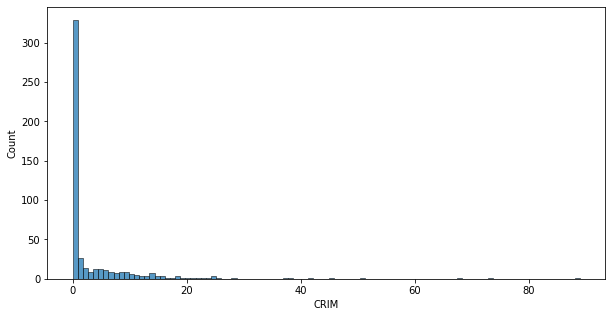

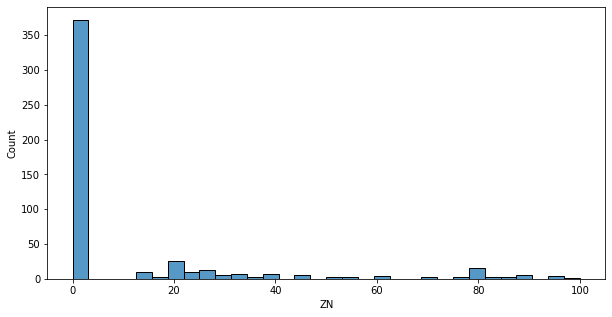

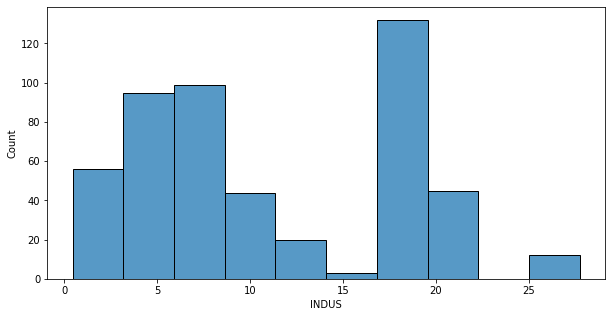

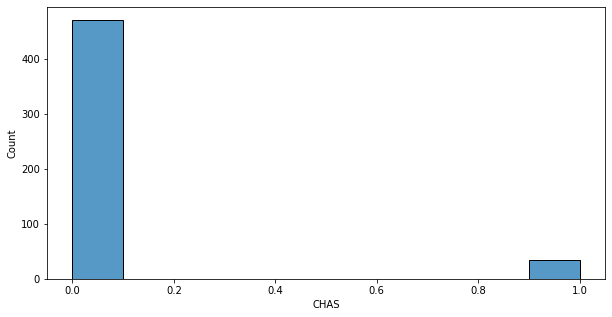

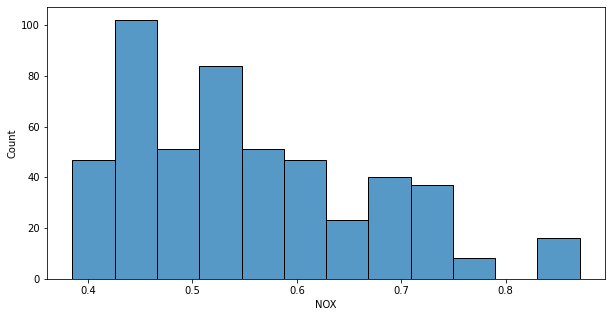

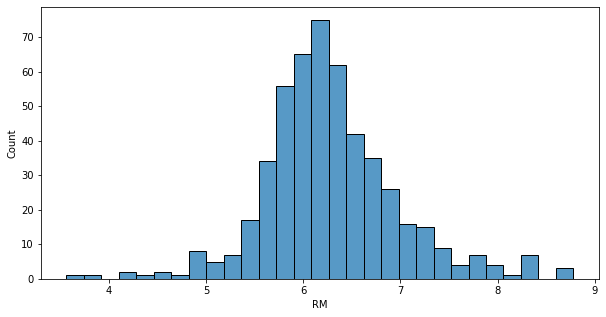

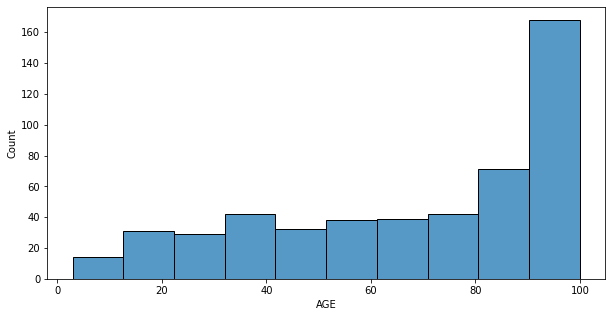

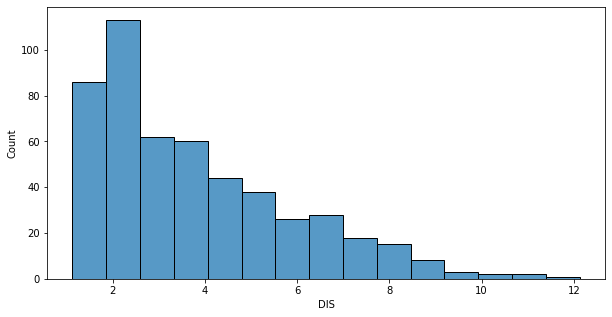

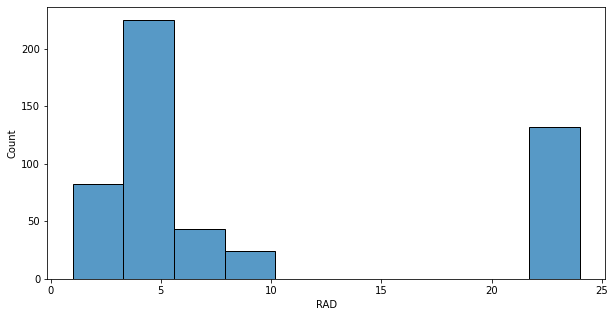

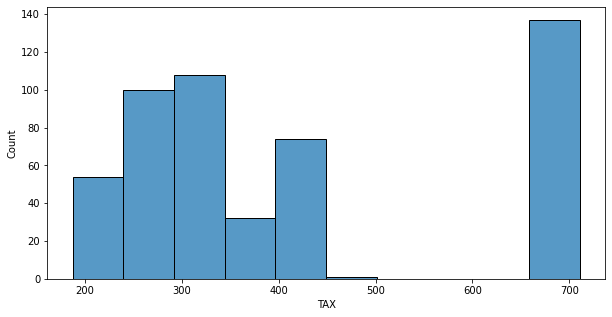

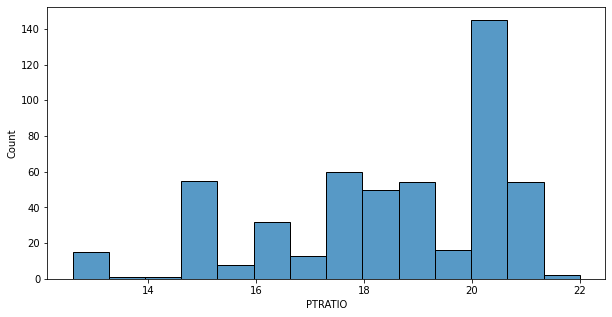

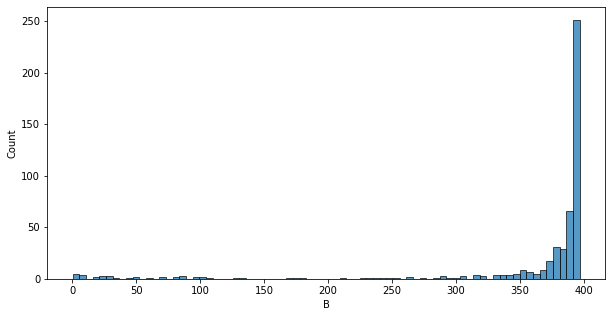

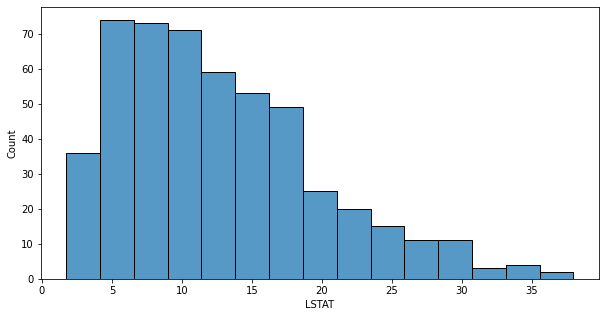

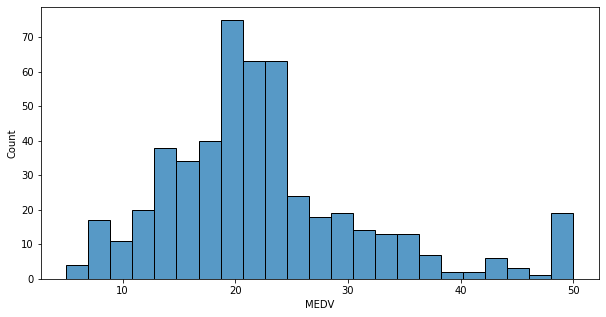

In [15]:
for column in data.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column])   


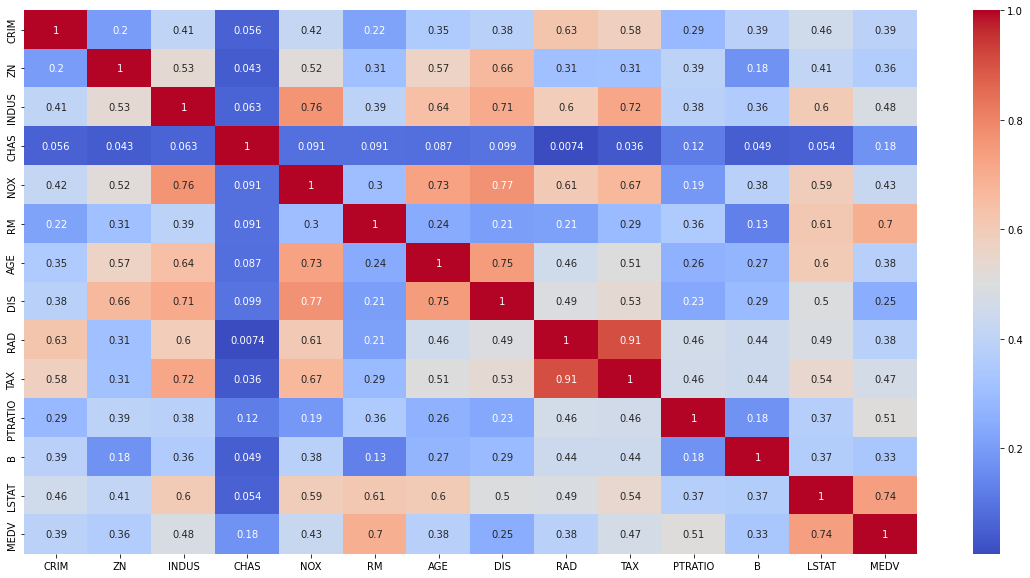

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True, cmap="coolwarm")

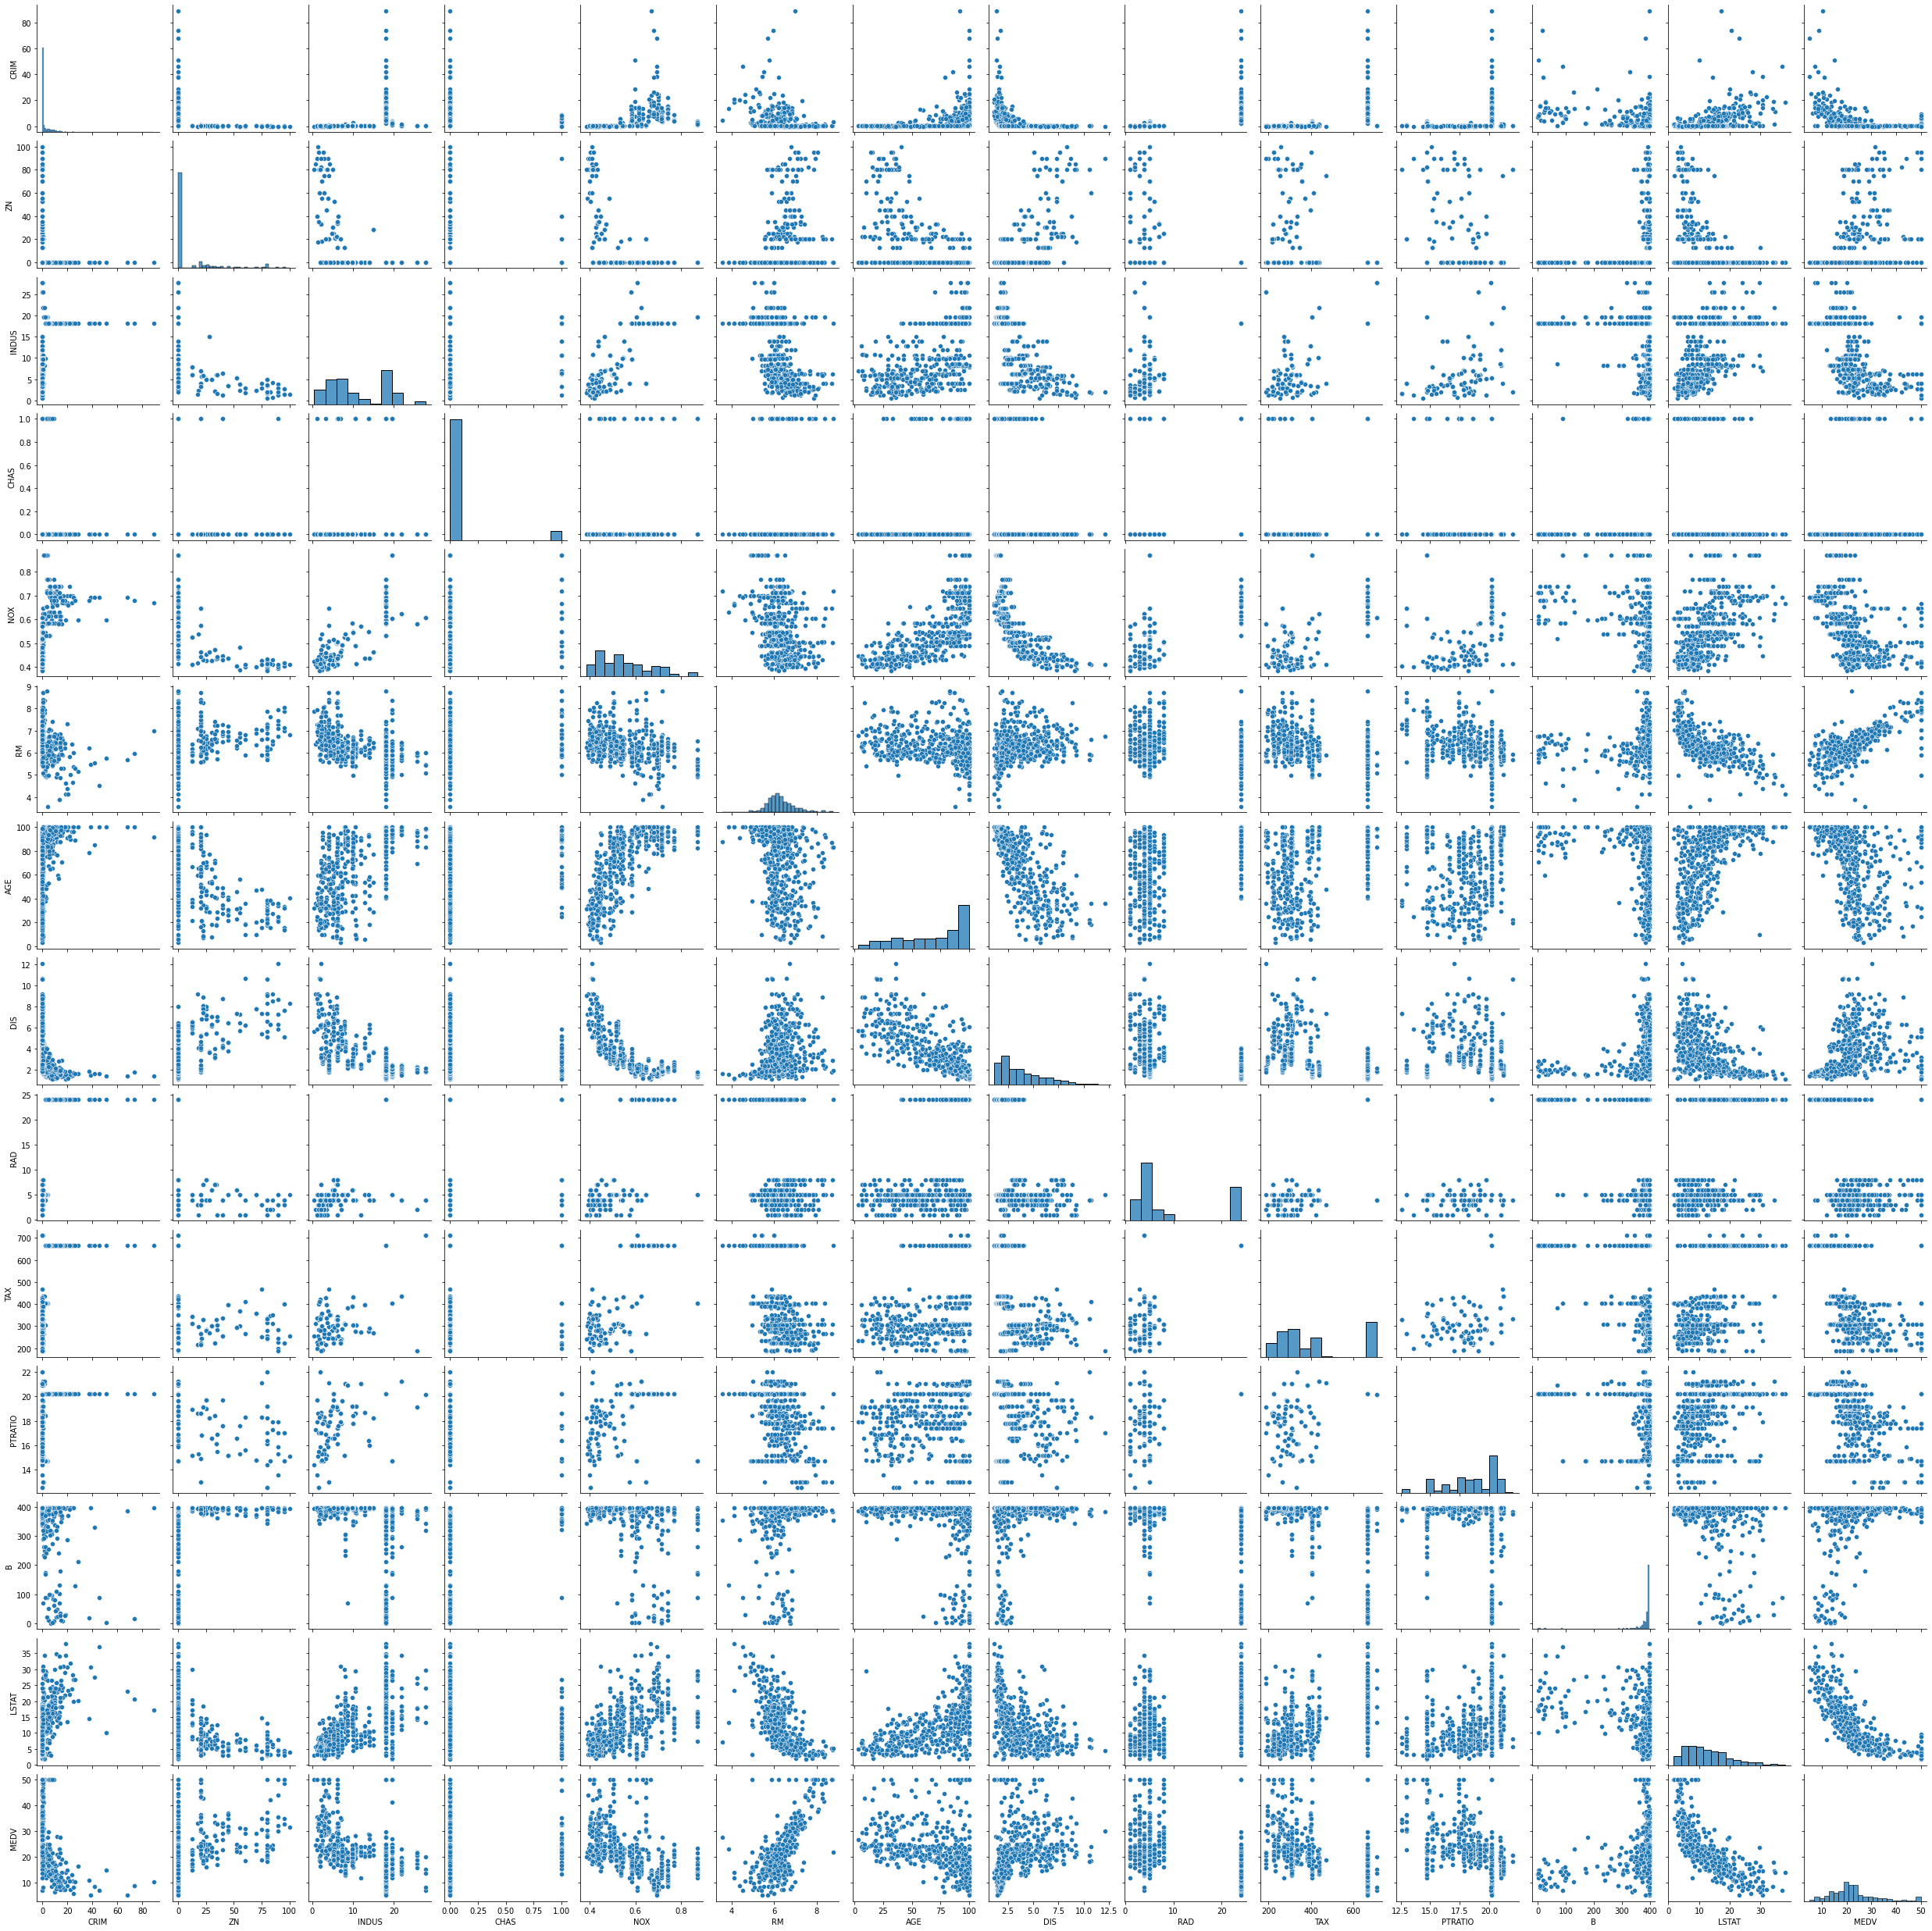

In [ ]:
sns.pairplot(data)

In [ ]:
correlated_features = set()
corr_columns = data.corr().columns
for i in range(len(corr_columns)):
  for j in range(i):
    if data.corr().abs().iloc[i, j] > 0.6:
            colname = corr_columns[i]
            correlated_features.add(colname)

In [ ]:
print(correlated_features)

{'LSTAT', 'RAD', 'NOX', 'TAX', 'DIS', 'MEDV', 'AGE'}


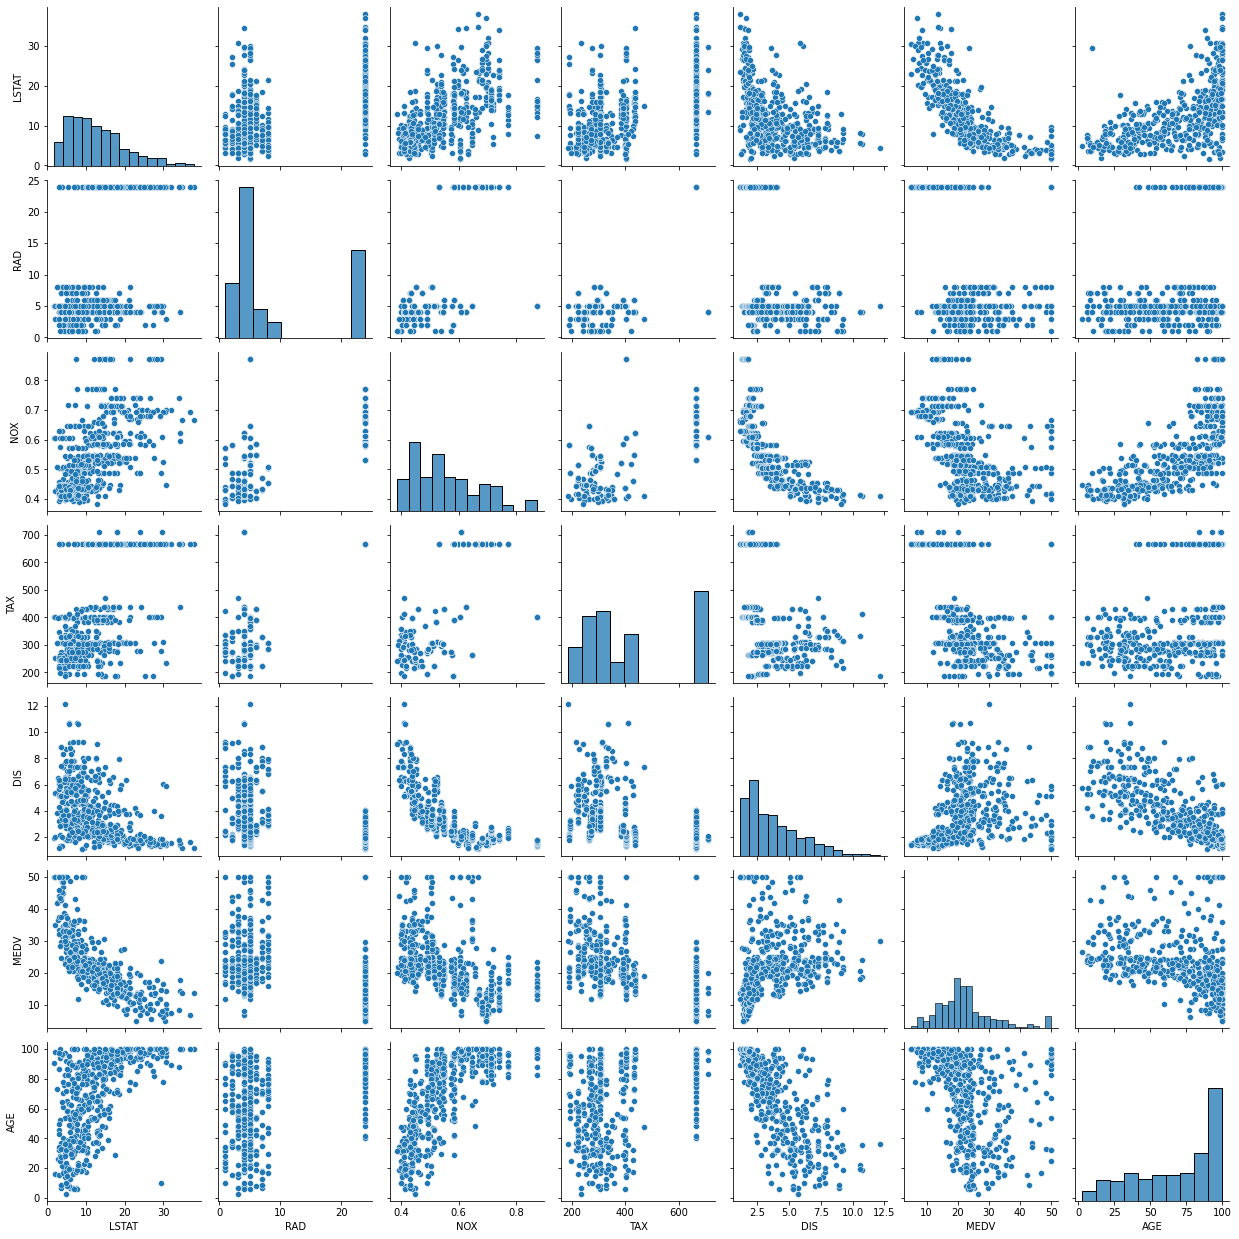

In [ ]:
sns.pairplot(data[correlated_features])

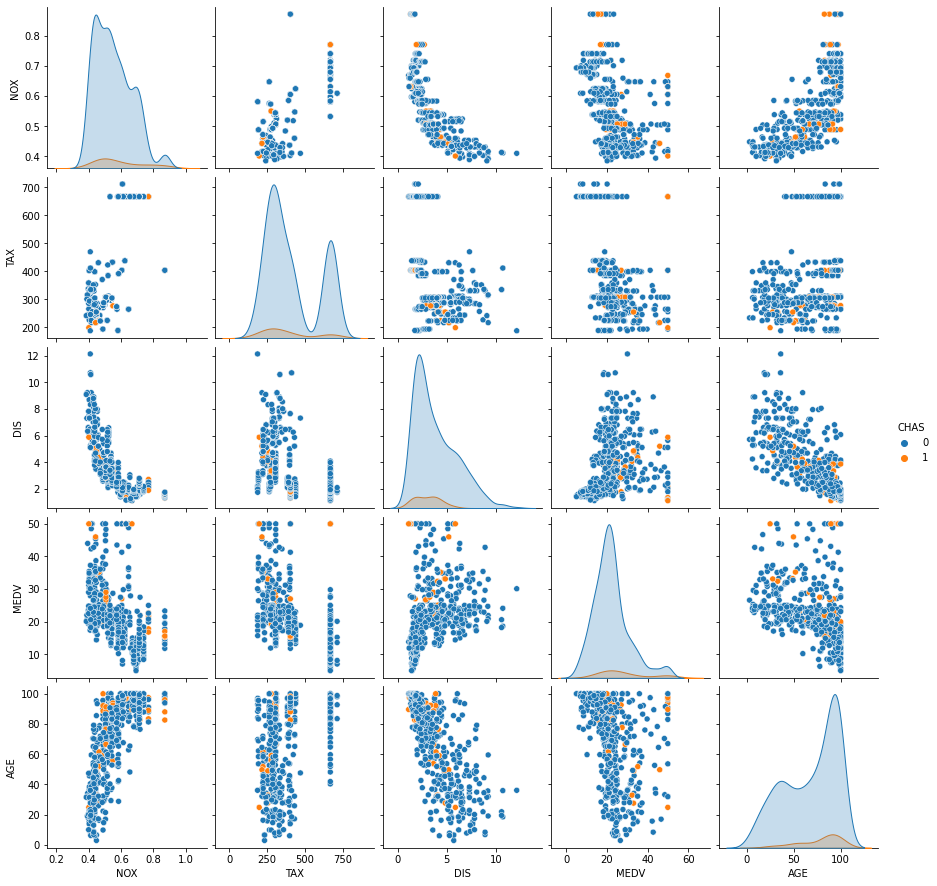

In [ ]:
correlated_features.add("CHAS")
sns.pairplot(data[correlated_features], hue="CHAS")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

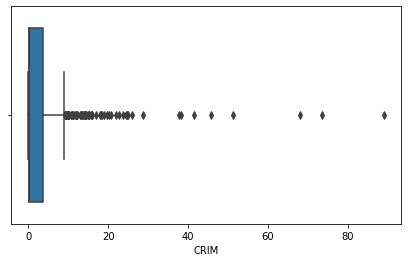

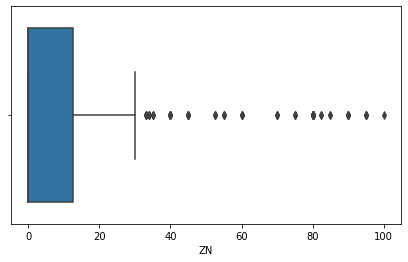

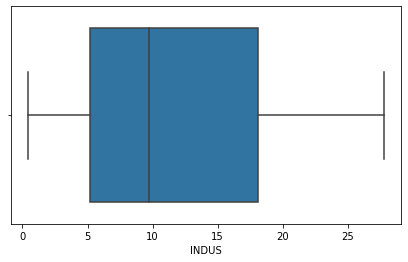

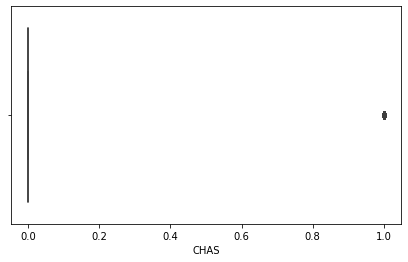

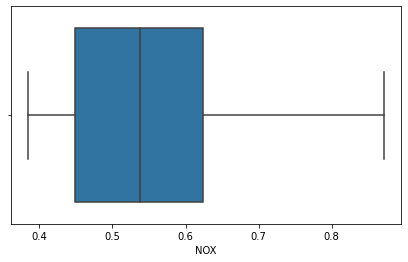

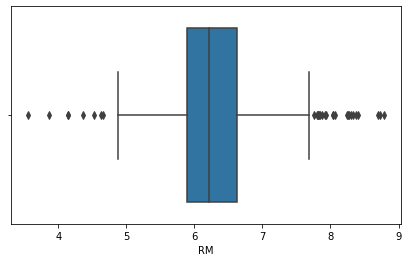

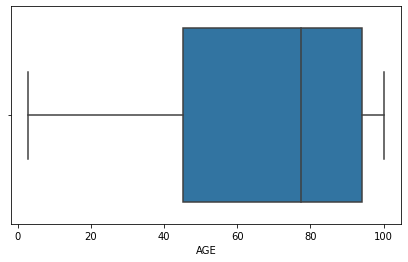

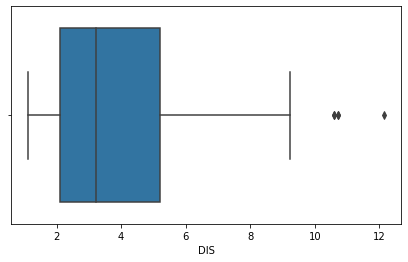

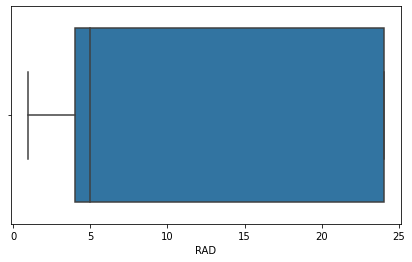

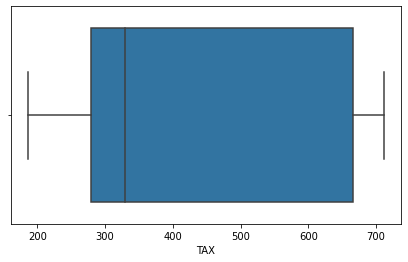

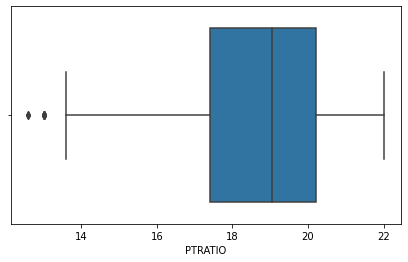

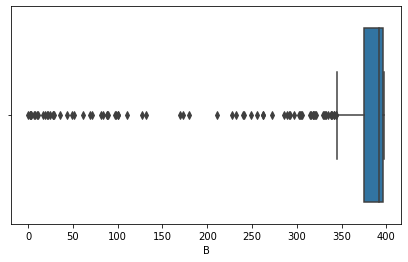

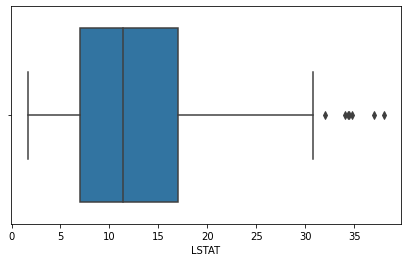

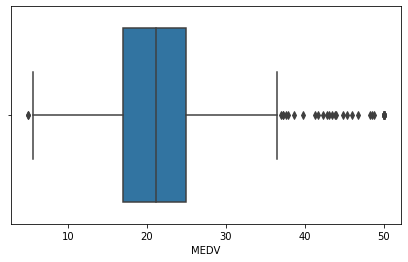

In [ ]:
for column in data.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data[column])  

In [ ]:
 for col, series in data.items():
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    v_col = series[(series <= q1 - 1.5 * IQR) | (series >= q3 + 1.5 * IQR)]
    percent = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Outliers in %s  = %.1f%%" % (col, percent))
    

Outliers in CRIM  = 13.0%
Outliers in ZN  = 13.4%
Outliers in INDUS  = 0.0%
Outliers in CHAS  = 100.0%
Outliers in NOX  = 0.0%
Outliers in RM  = 5.1%
Outliers in AGE  = 0.0%
Outliers in DIS  = 1.0%
Outliers in RAD  = 0.0%
Outliers in TAX  = 0.0%
Outliers in PTRATIO  = 3.2%
Outliers in B  = 15.2%
Outliers in LSTAT  = 0.0%
Outliers in MEDV  = 8.7%


## Feature Selection and Engineering


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import preprocessing

In [ ]:
corr_matrix = data.corr().abs()
filtered_corr = corr_matrix["MEDV"] > 0.4
correlated_cols = corr_matrix["MEDV"][filtered_corr]
correlated_cols.keys()

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

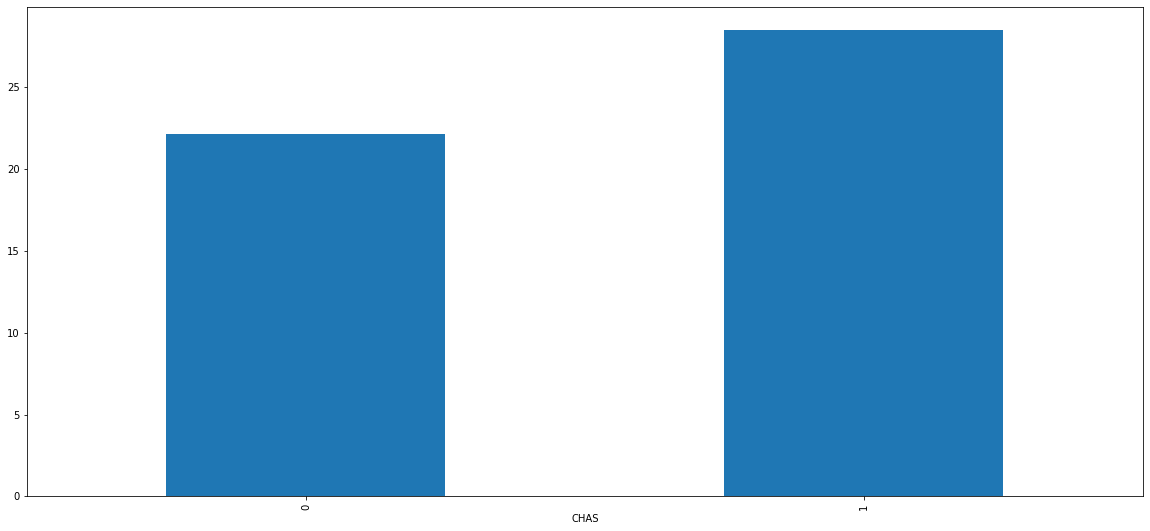

In [ ]:
plt.subplots(figsize=(20, 9))
data.groupby("CHAS")['MEDV'].mean().plot.bar()

In [ ]:
retained = list()
for col in correlated_cols.keys():
  retained.append(col)
retained.append("CHAS")

for col in retained:
    if np.abs(data[col].skew()) > 0.3:
        data[col] = np.log1p(data[col])

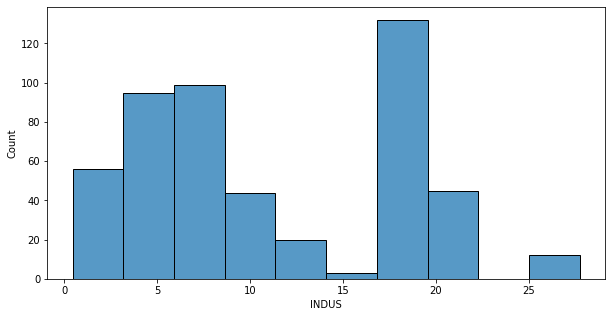

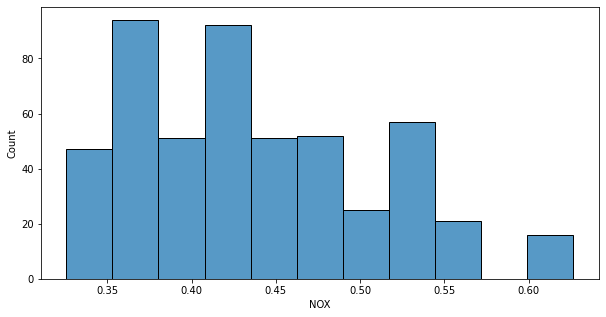

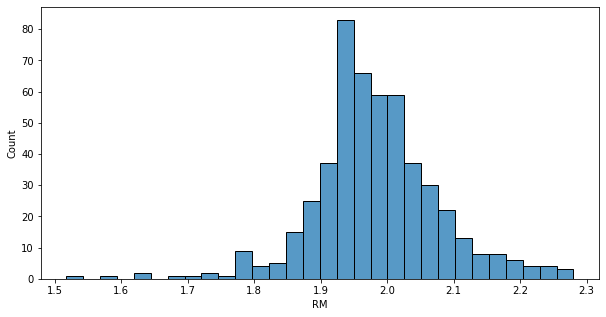

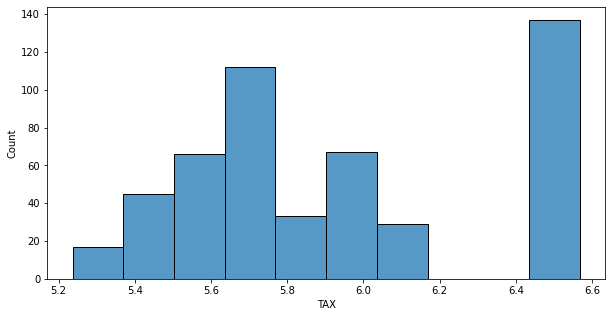

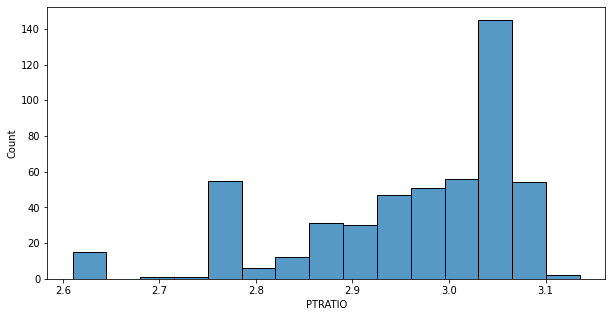

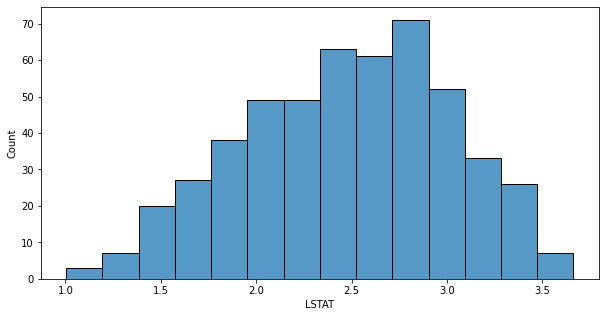

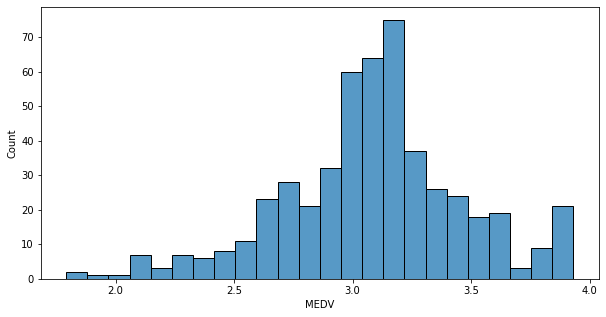

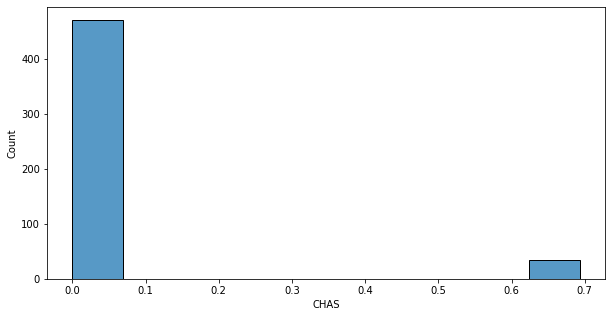

In [ ]:
for column in retained:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column])   

In [ ]:
X = data[retained].drop(columns=['MEDV'])
y = data["MEDV"]

## Predictive Modelling





In [ ]:
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
robust_scaler = preprocessing.RobustScaler()
x_scaled = robust_scaler.fit_transform(X)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f" % (scores.mean()))

MSE: -0.05
